Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        706 non-null    int64  
 1   ActivityDate              706 non-null    object 
 2   TotalSteps                706 non-null    int64  
 3   TotalDistance             706 non-null    float64
 4   TrackerDistance           706 non-null    float64
 5   LoggedActivitiesDistance  706 non-null    float64
 6   VeryActiveDistance        706 non-null    float64
 7   ModeratelyActiveDistance  706 non-null    float64
 8   LightActiveDistance       706 non-null    float64
 9   SedentaryActiveDistance   706 non-null    float64
 10  VeryActiveMinutes         706 non-null    int64  
 11  FairlyActiveMinutes       706 non-null    int64  
 12  LightlyActiveMinutes      706 non-null    int64  
 13  SedentaryMinutes          706 non-null    int64  
 

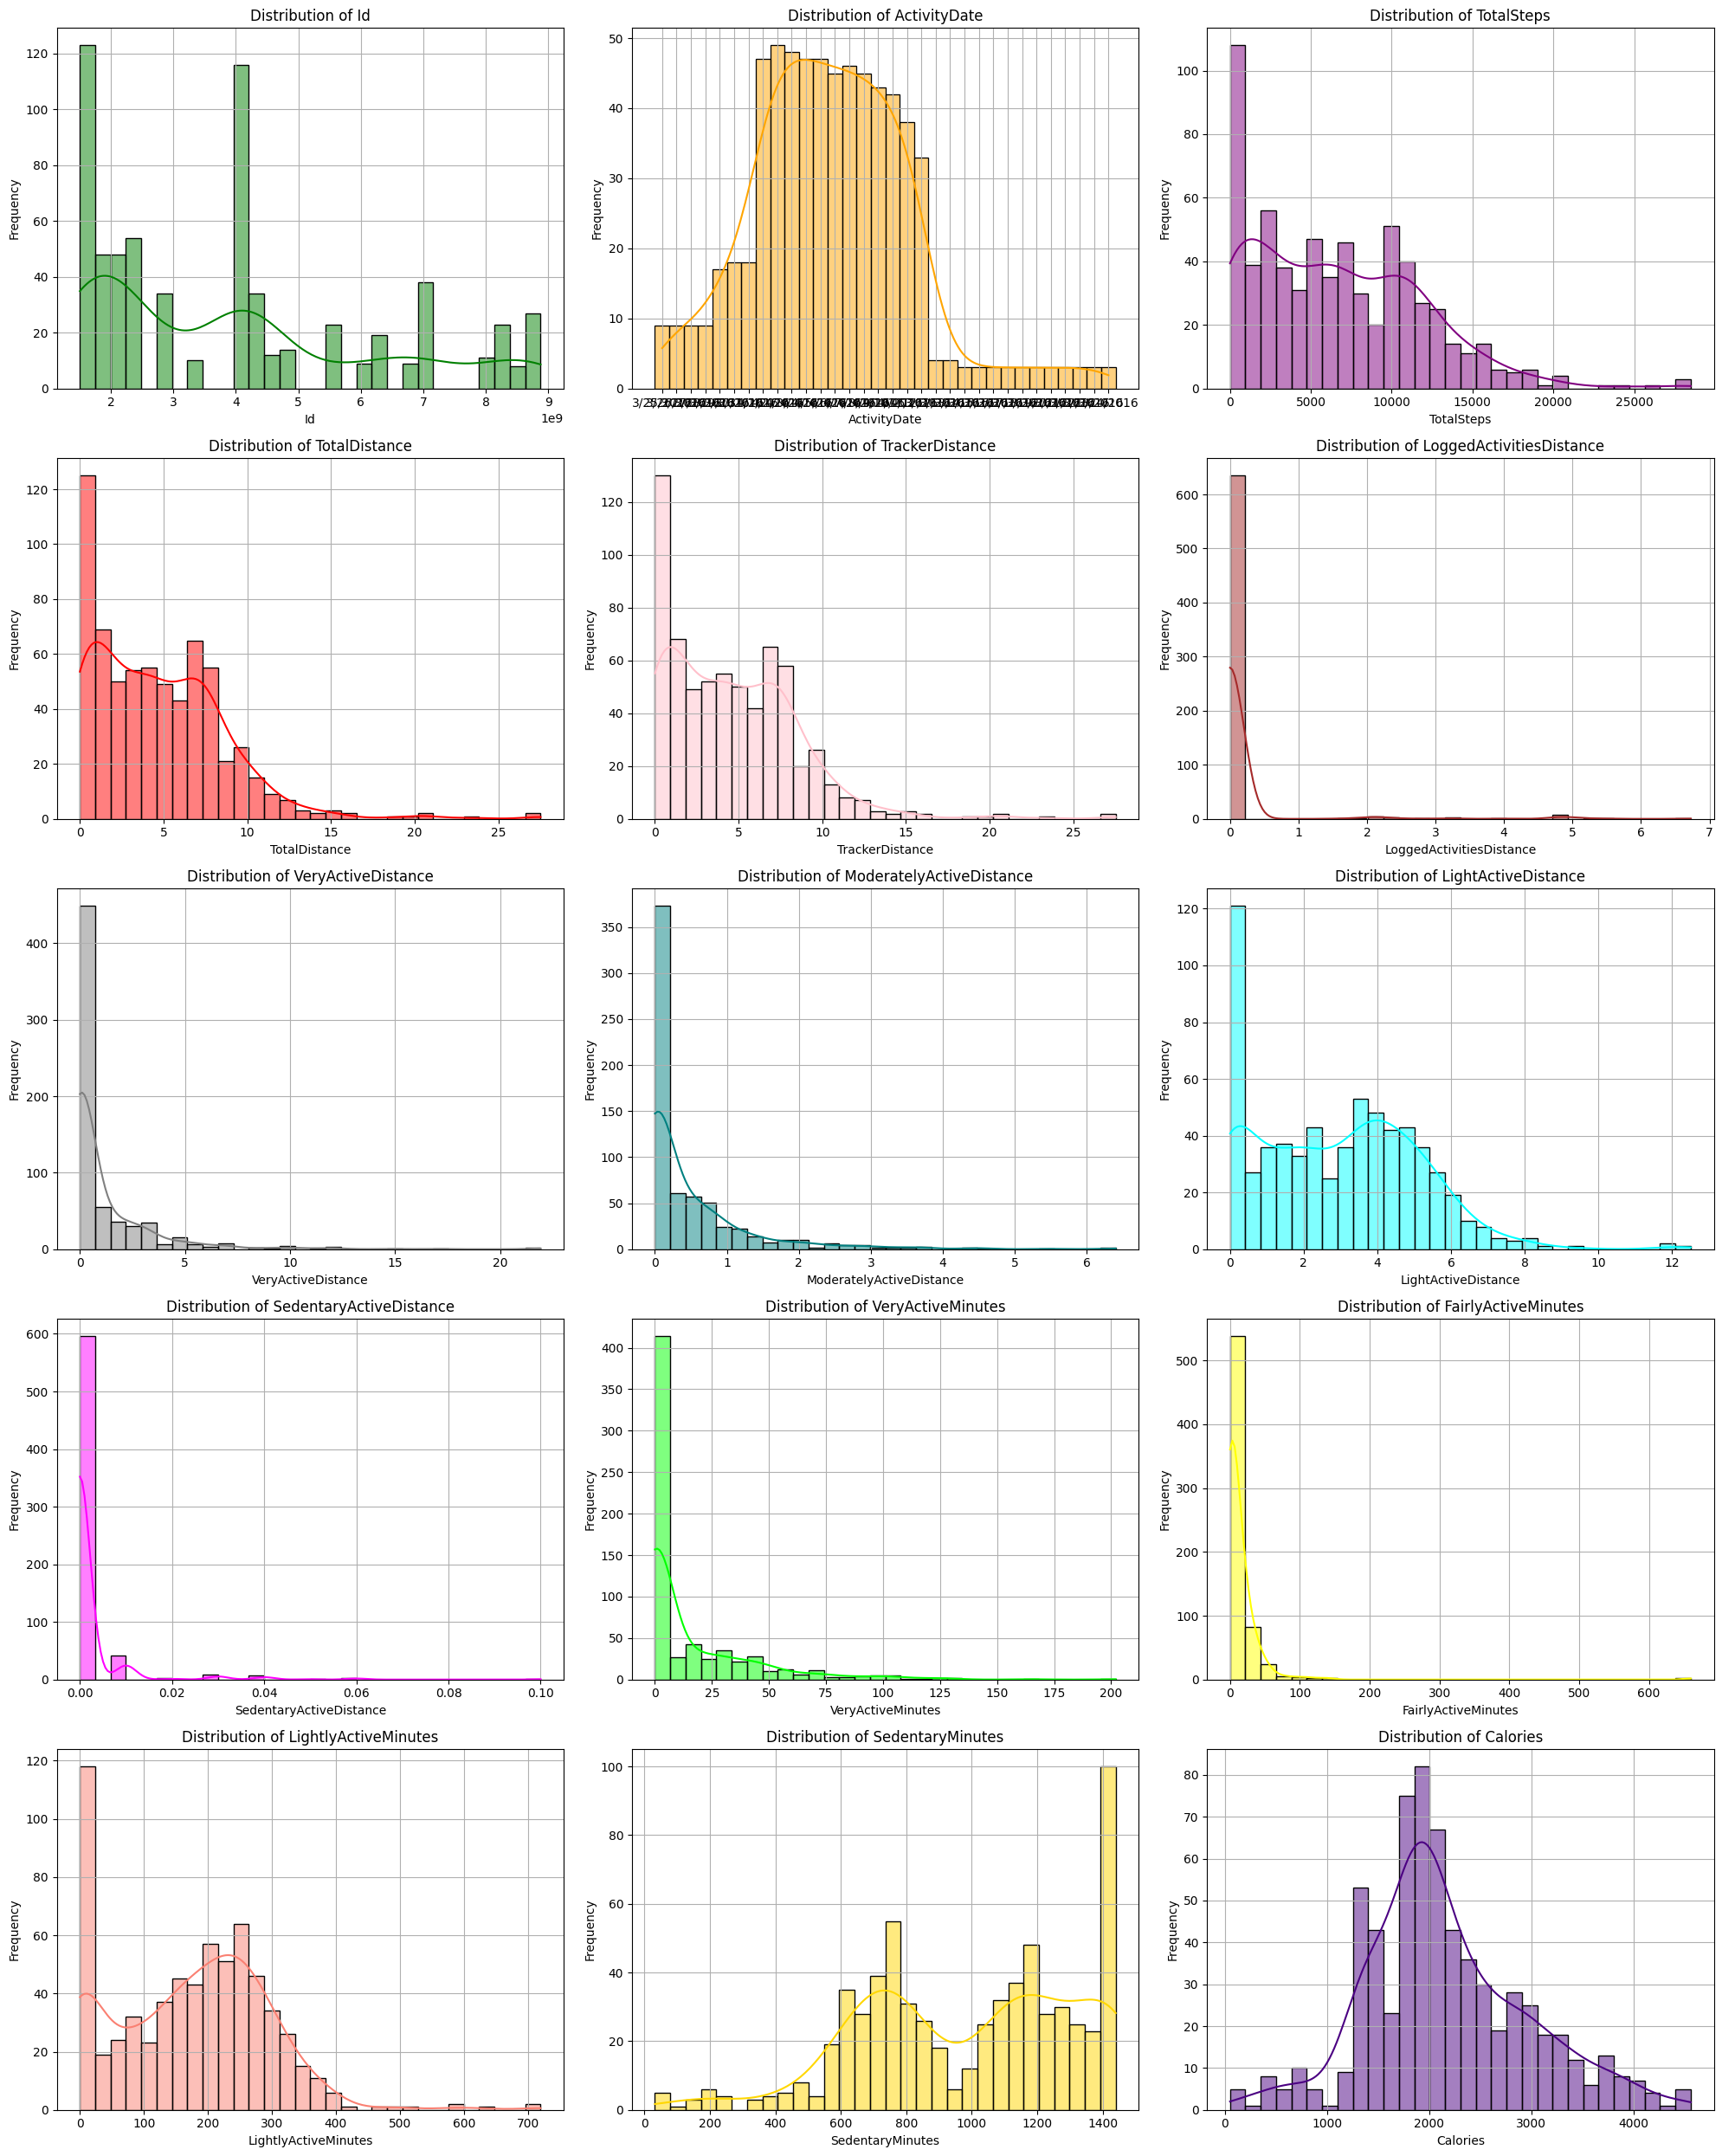

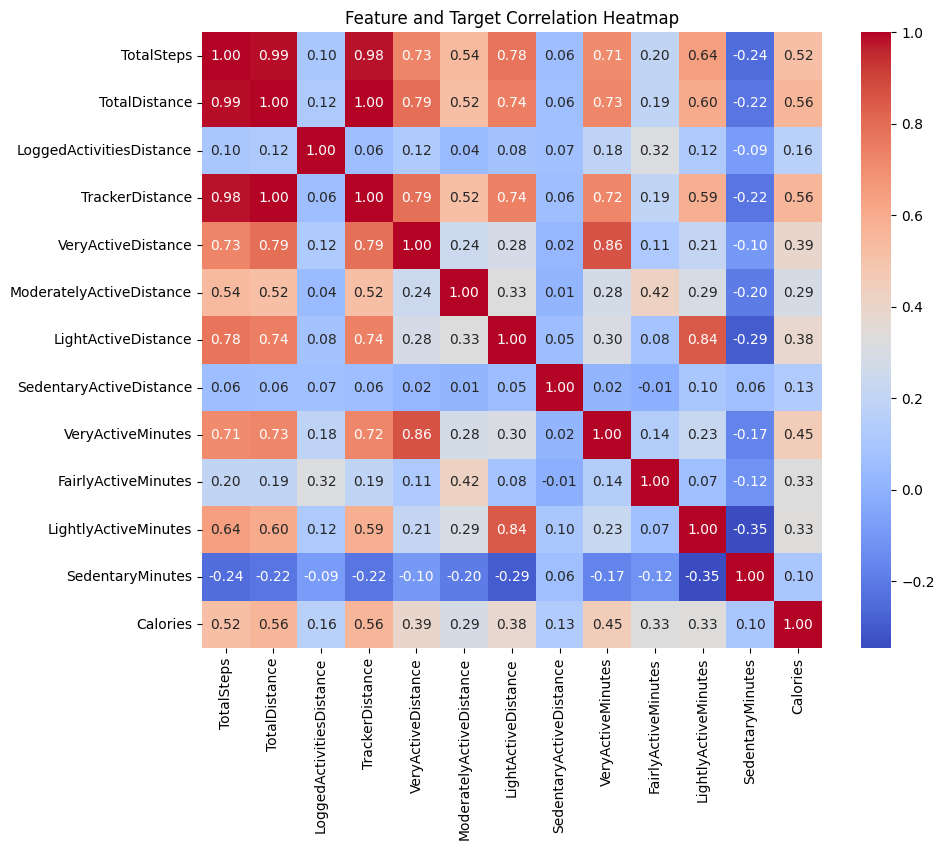


Linear Regression Results:
Mean Squared Error (MSE): 178614.36
R-squared (R²): 0.73
Mean Absolute Error (MAE): 341.14


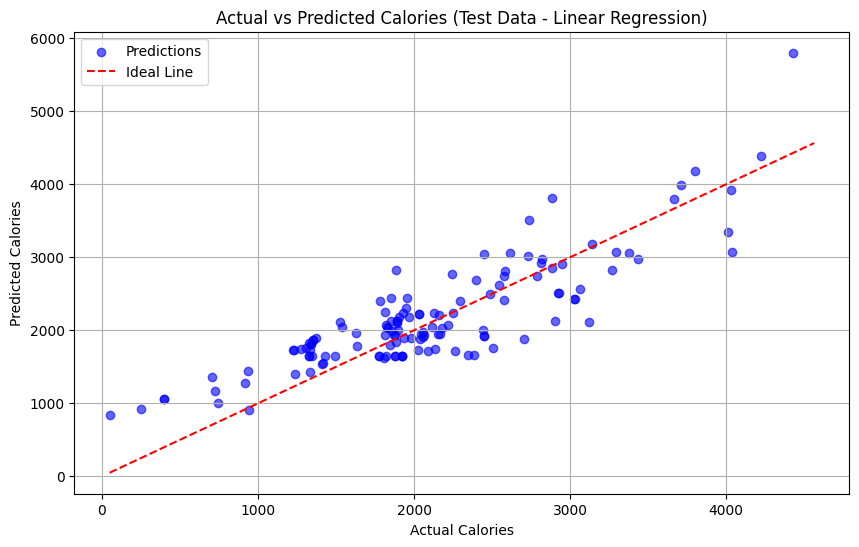

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Data
try:
    data = pd.read_csv('fit-data.csv')
except FileNotFoundError:
    print("Error: The file 'fit-data.csv' was not found. Please check the file path.")
    exit()

# Step 2: Data Overview
print("Dataset Info:")
data.info()

print("\nDataset Description:")
print(data.describe())

print("\nFirst Few Rows:")
print(data.head())

num_data_points = data.shape[0] 
num_features = data.shape[1]
print(f"Number of Data Points: {num_data_points}")
print(f"Number of Features: {num_features}")

# Step 3: Check for Missing and Duplicate Data
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

duplicates = data.duplicated().sum()
print(f"\nTotal Duplicates: {duplicates}")

# Step 4: Data Cleaning
data = data.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['int64', 'float64'] else col.fillna(col.mode()[0]), axis=0)
data.drop_duplicates(inplace=True)
data = data[data['Calories'] > 0]

print(f"\nData shape after cleaning: {data.shape}")

# Step 5: Data Types
data_types = data.dtypes
print("Data Types:\n", data_types)

# Step 6: Key Distributions
colors = ['blue', 'green', 'orange', 'purple', 'red', 'pink', 'brown', 'gray', 'teal', 'cyan',
          'magenta', 'lime', 'yellow', 'salmon', 'gold', 'indigo', 'lightblue', 'lightgreen', 
          'lightcoral', 'skyblue', 'violet']

num_columns = len(data.columns)
rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)
plt.figure(figsize=(20, rows * 5))
for i, column in enumerate(data.columns, 1):
    plt.subplot(rows, 3, i) 
    sns.histplot(data[column], bins=30, kde=True, color=colors[i % len(colors)], edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()



# Step 7: Define Features and Target
features = ['TotalSteps', 'TotalDistance','LoggedActivitiesDistance', 'TrackerDistance','VeryActiveDistance',
            'ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes', 
            'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
X = data[features]
y = data['Calories']

# Step 8: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_data = pd.concat([X, y], axis=1)
sns.heatmap(corr_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature and Target Correlation Heatmap')
plt.show()

# Step 9: Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 10: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Step 11: Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 12: Model Predictions
y_pred = linear_model.predict(X_test)

# Step 13: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nLinear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Step 14: Visualization - Actual vs Predicted for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label="Ideal Line")
plt.title('Actual vs Predicted Calories (Test Data - Linear Regression)')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.legend()
plt.grid()
plt.show()
